<a href="https://colab.research.google.com/github/chablis8/Projects/blob/master/Salary_Prediction_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Predictions Based on Job Descriptions**

## **Part 1 - DEFINE**

### ---- 1 Define a problem ---- 
Salary is always the vital indicator for job seeker to start the career. It's also important for employer. It is one of the difficult tasks for employer/HR to offer ideal salary to ideal candidate not only saves the budget for the company but also not overlook the talents of the candidates.

### ---- Project Goal ----
The main goals of the project is that help the Companies to hire the right candidates with the right salary based on various factors (degree, experiences etc.)

__author__ = "Jeffrey Wong"

__email__ = "jeffrey-wong@live.com"

__acknowledgement__ = "Data Science Dream Job"


In [6]:
#@title Module Presettings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
#np.random.seed(18989)
#Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


## **Part 2 Discovery**

### ---- 2 Load the data ----

In [7]:
#load the data into a Pandas dataframe
train_feature_df = pd.read_csv('/content/drive/My Drive/EDA_DSDJ/train_features.csv')
train_target_df = pd.read_csv('/content/drive/My Drive/EDA_DSDJ/train_salaries.csv')
test_feature_df = pd.read_csv('/content/drive/My Drive/EDA_DSDJ/test_features.csv')

#### ---- 2.1 Examine the data ----

In [117]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [118]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [119]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


#### ---- 2.2 Merge the train features and train target dataset

In [8]:
train_df = pd.merge(train_feature_df, train_target_df, on='jobId', how="left")
del train_feature_df, train_target_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [9]:
train_df.shape

(1000000, 9)

In [148]:
train_df.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684742491,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


### ---- 3 Clean missing and duplicated data

In [149]:
# check missing data and duplicate values in dataframe
train_df.duplicated().sum()

0

In [150]:
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

#### ---- 3.1 Identify outliers ----

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


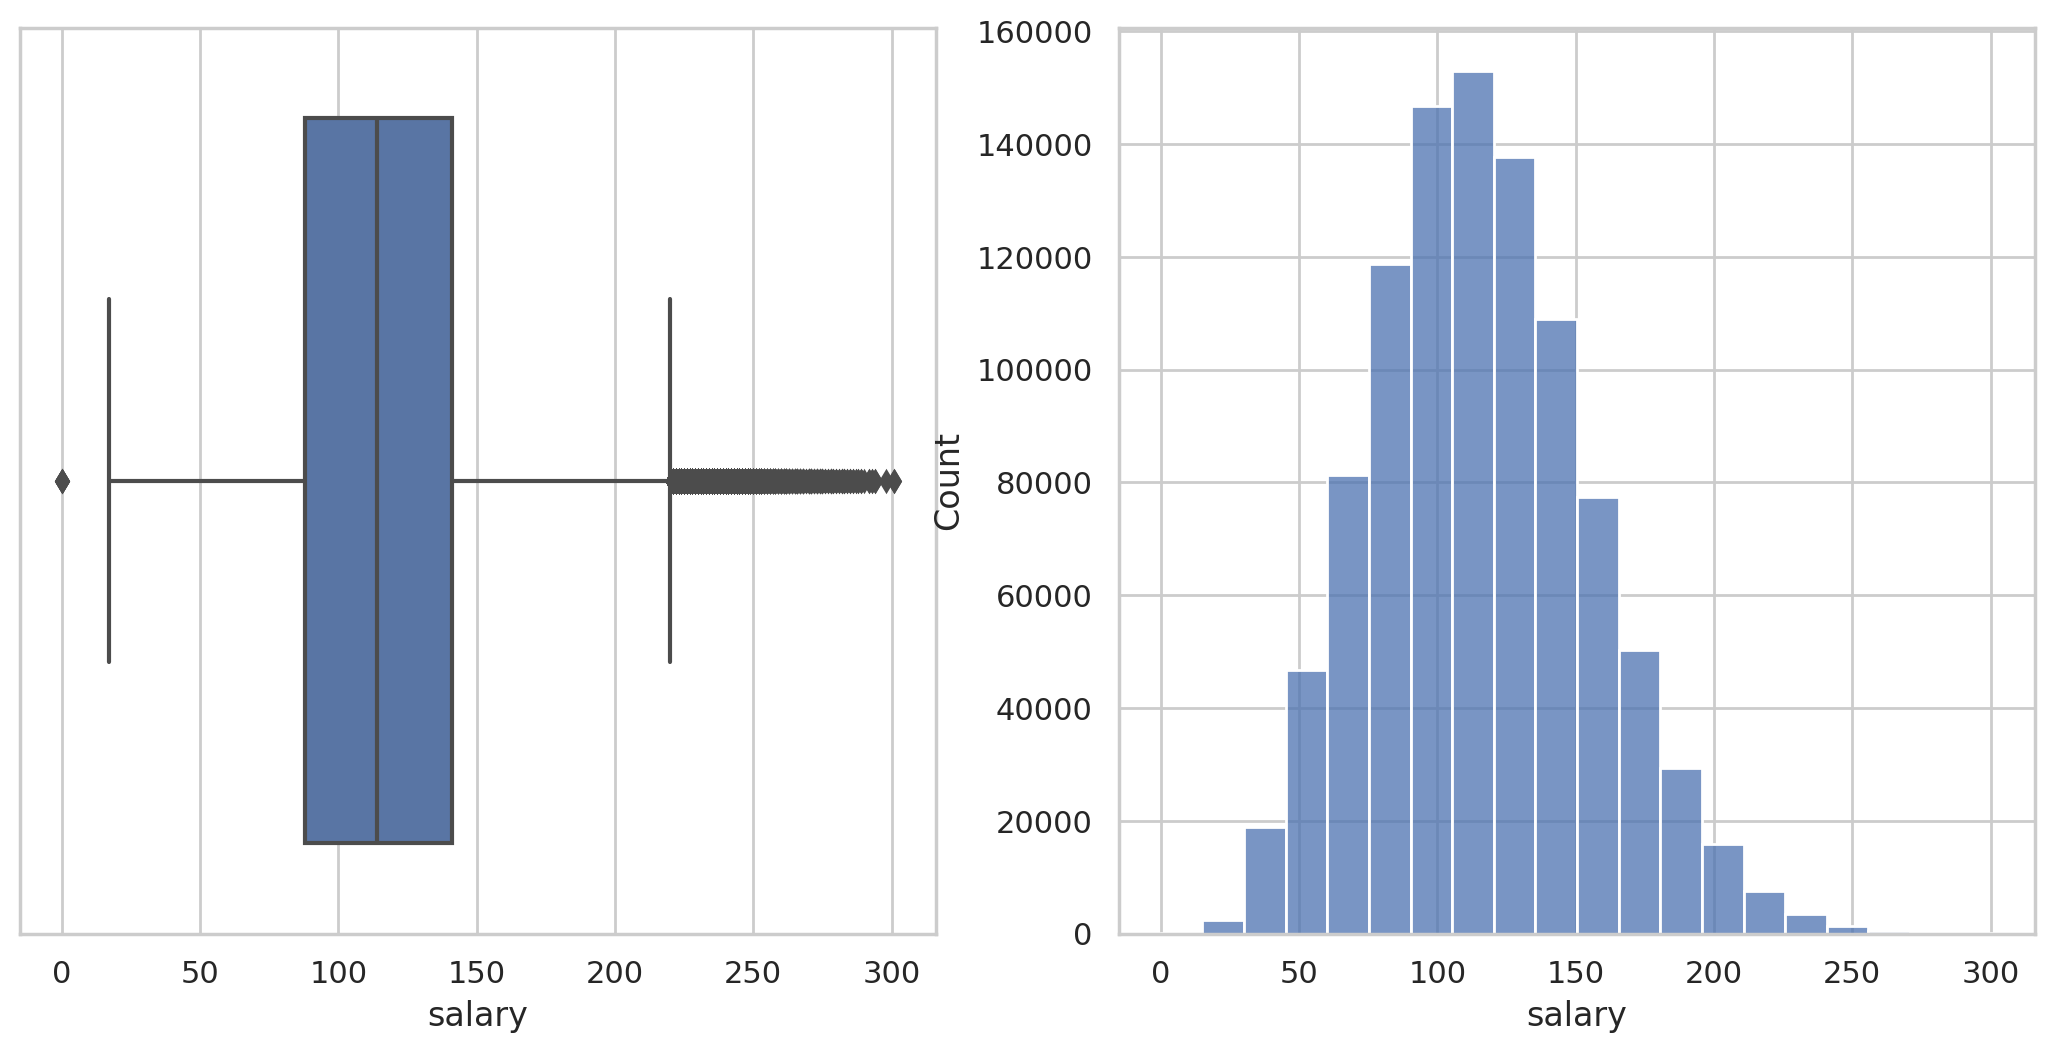

In [153]:
#Visualize Salary Distribution

sns.set(style ="whitegrid")
plt.figure(figsize = (13, 6))
ax1 = plt.subplot(1,2,1)
sns.boxplot(train_df.salary)

ax2 = plt.subplot(1,2,2)
sns.histplot(train_df.salary, bins=20)
plt.show()

We notice there are quite some outliers below and above upper and lower bounds of the range

In [10]:
#Examine Outliers with IQR
def outlier(df):
  stat = df.describe()
  iqr = stat['75%'] - stat['25%']
  upper = stat['75%'] + 1.5 * iqr
  lower = stat['25%'] - 1.5 * iqr
  print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

outlier(train_df.salary)

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [11]:
train_df[(train_df.salary < 8.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Low-end outliers do look like corrupted data, as those are not likely to be volunteer work.

In [12]:
# remove the low-end outliers
train_df = train_df[train_df.salary > 8.5]
train_df.shape

(999995, 9)

In [13]:
train_df.loc[(train_df.salary > 220.5),'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

Data in the high end appears to be more reasonable with the job type. The 'Junior' type appeals to be more related to consulation. We will keep those data.

In [123]:
train_df[(train_df.salary>220.5) & (train_df.jobType=="JUNIOR")].head(15)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


### ---- 4 Explore the data (EDA) ----

In [ ]:
# use sweetviz to visualize the correlation among features
!pip install sweetviz

In [19]:
import sweetviz as sv
report = sv.analyze(train_df)
report.show_html('/content/drive/My Drive/EDA_DSDJ/report.html', open_browser=False, layout='vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/My Drive/EDA_DSDJ/report.html was generated.


In [ ]:
from IPython.display import HTML
HTML('/content/drive/My Drive/EDA_DSDJ/report.html')

From the association table, we found that Salary has a strong negative correlation with distance from the metro but a strong positive correlation with years of experience.

In [14]:
#define a function to plot both the numeric and categorical features in the dataset 
def feature_plot(df, col):
    #state the plot size 
    plt.figure(figsize = (8, 6))
       
    if df[col].dtype == 'int64':
        mean = df.groupby(col)['salary'].mean()
        mean.plot()
        
    else:
        #if column is not numeric then plot the following:

        sns.boxplot(x = col, y = 'salary', data=df)
        
    #set the labels on the axis    
    plt.xticks(rotation = 45)
    plt.ylabel('salary')
    plt.show()

#### ---- 4.1 Visualize the correlations between the Features and Target

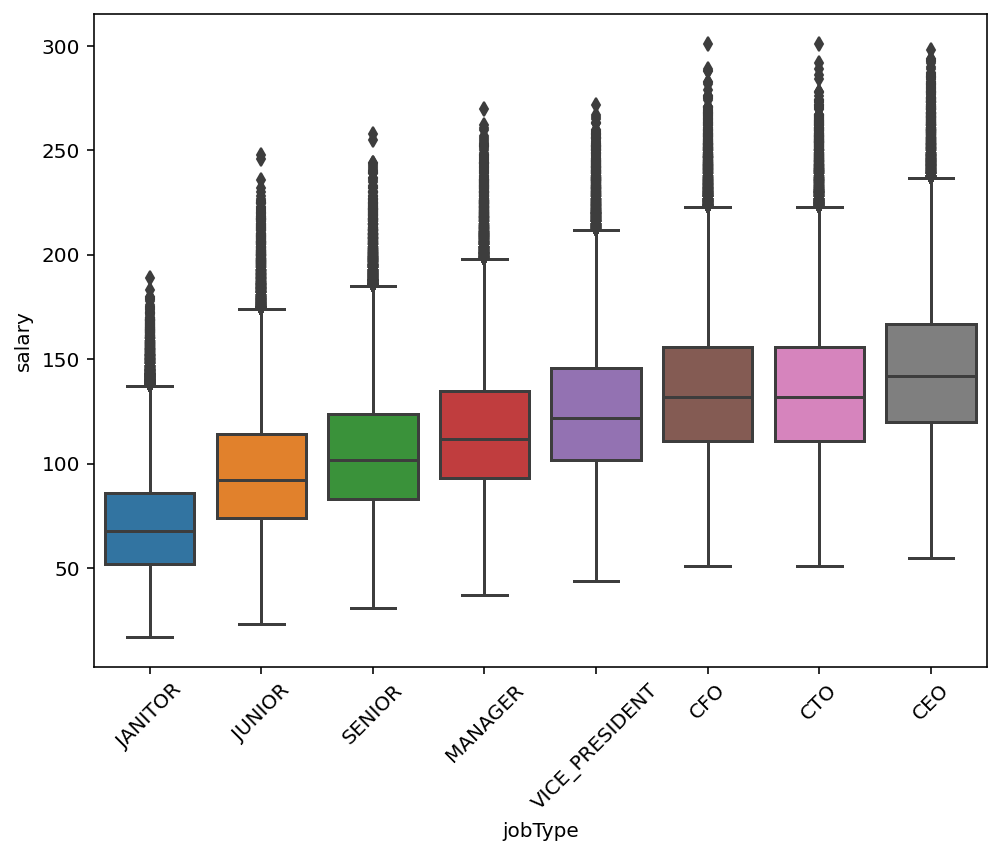

In [15]:
feature_plot(train_df.sort_values('salary',ascending = True), 'jobType')

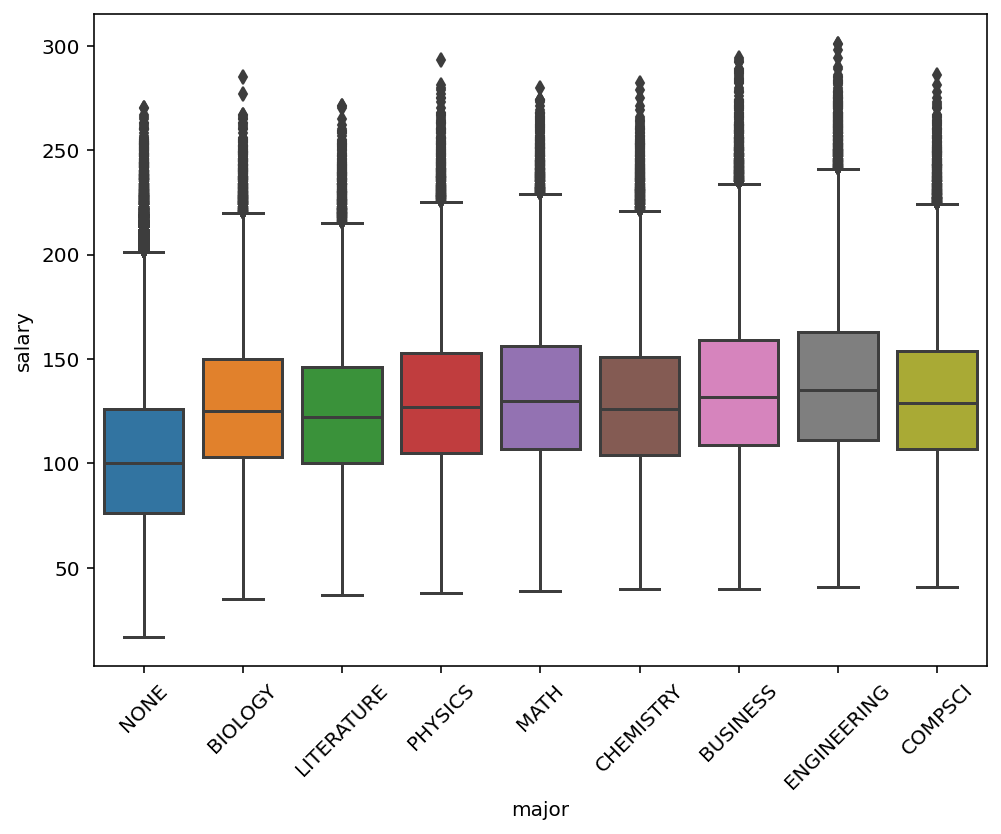

In [16]:
feature_plot(train_df.sort_values('salary',ascending = True), 'major')

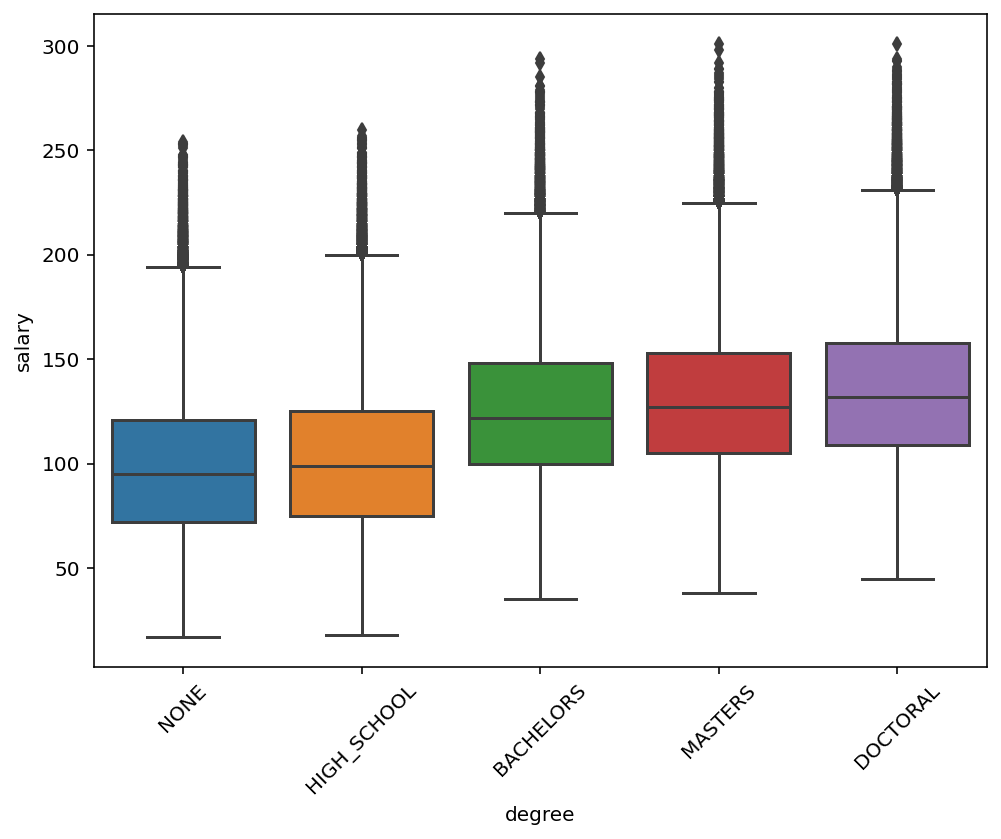

In [17]:
feature_plot(train_df.sort_values('salary',ascending = True), 'degree')

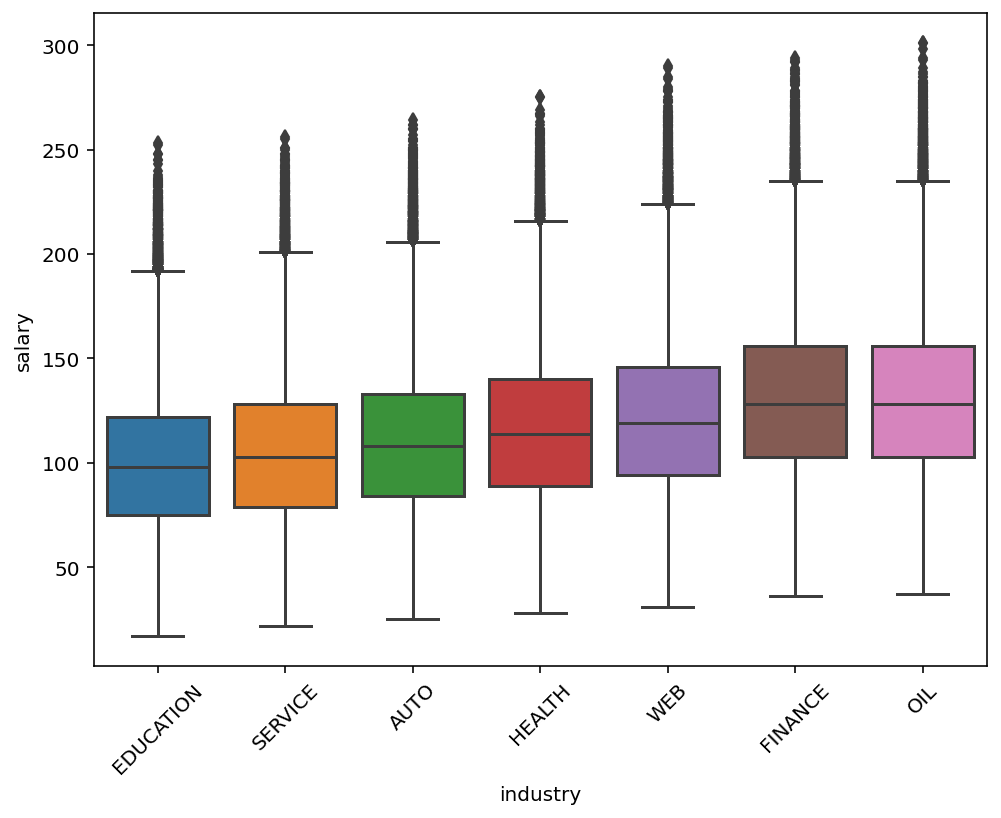

In [18]:
feature_plot(train_df.sort_values('salary',ascending = True), 'industry')

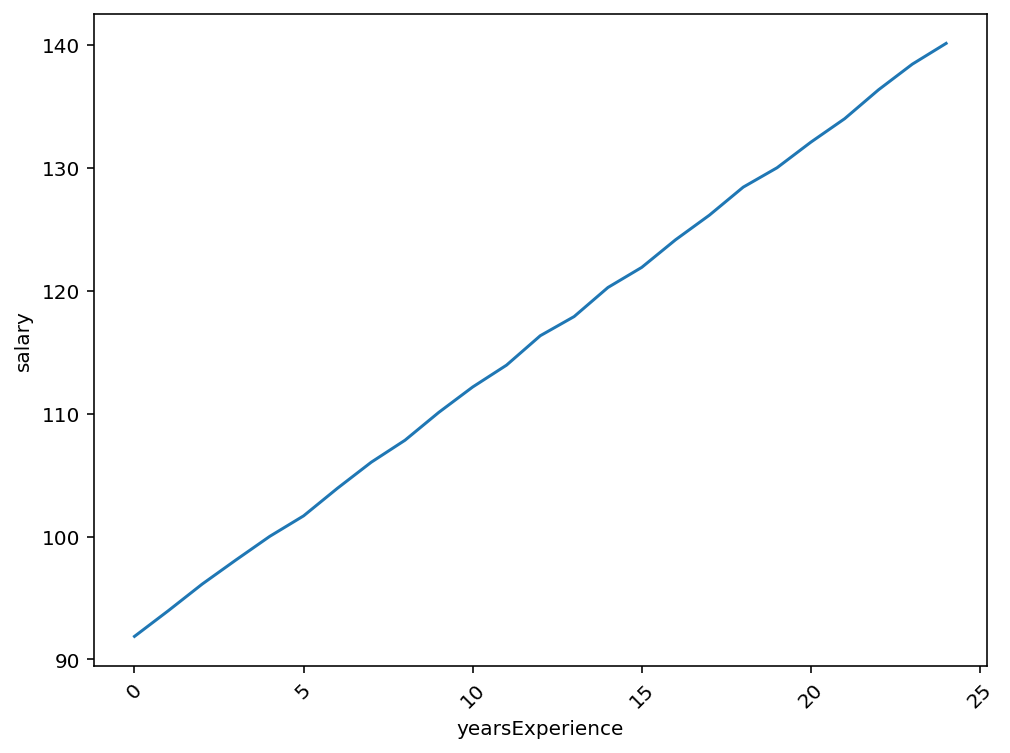

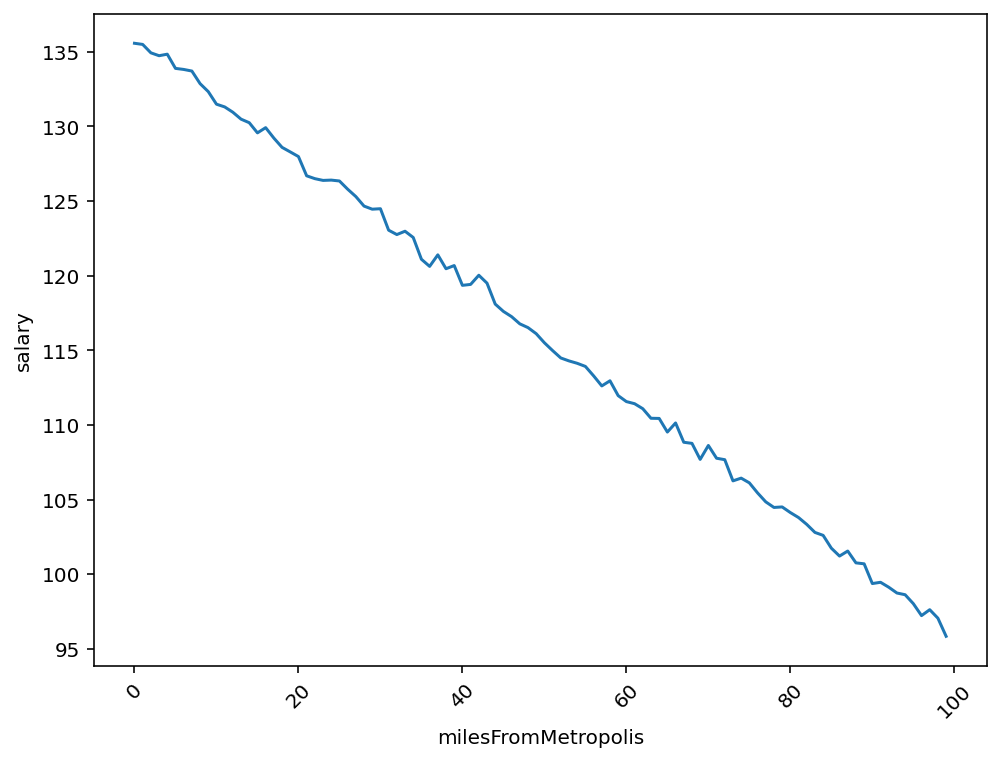

In [19]:
feature_plot(train_df.sort_values('salary',ascending = True), 'yearsExperience')
feature_plot(train_df.sort_values('salary',ascending = True), 'milesFromMetropolis')

The plots are aligned with the findings in the correlation table

### ---- 5 Establish baseline ----

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple (naive) model and measure its efficacy. e.g. use "average salary" for each industry as the model and then measure MSE
#during 5-fold cross-validation

First, we create a simple baseline model and then try to compare several model predictions with it. In general, HR will use the mean salary in industries to benchmark the salary, we will use the the mean salary of each industry categories as the baseline reference.

In [20]:
avg = train_df.groupby('industry').mean().reset_index()[['industry','salary']]
avg

,industry,salary
0,AUTO,109.435222
1,EDUCATION,99.448386
2,FINANCE,130.747659
3,HEALTH,115.735540
4,OIL,130.953863
5,SERVICE,104.446820
6,WEB,121.645362


In [21]:
train_df = pd.merge(train_df, avg, on='industry', how="left")

In [22]:
train_df.columns = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary', 'avg_salary_by_ind']

In [23]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary_by_ind
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.735540
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,121.645362
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.735540
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,109.435222
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,130.747659


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print("The MSE of baseline model is {:.2f}".format(mean_squared_error(train_df.salary, train_df.avg_salary_by_ind)))

The MSE of baseline model is 1367.12


## **Part 3 - Develop**

- 3 models are selected to run and compare the MSE
- Lasso: a regularized linear regression
- Random Forest: multiple decison trees to reduce the variance
- Gradient Boosting: train a series of  small decision trees by converting weak learners into strong learners

In [48]:
#install pre-processing libraries from sklearn
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# import models
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [25]:
#split features and target variable
X = train_df.iloc[:,1:-2]
#y = train_df.iloc[:,-2:-1]
y = train_df.salary

In [26]:
X.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [27]:
y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [28]:
# define categorical/numeric covariates for training
categorical = (X.dtypes == object)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#scale numeric features and hot-encode categorical features
preprocess = make_column_transformer((StandardScaler(with_mean=True, with_std=True),~categorical),
                                     (OneHotEncoder(drop='first'), categorical))

# Lasso model (coefficient can be zero to reduce unneccesary features)
lasso = make_pipeline(preprocess, LassoCV(cv=5, n_jobs=-1, verbose=1, max_iter=200, random_state=42), verbose=1)


In [30]:
first = lasso.fit(X_train, y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   1.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.3min finished


[Pipeline] ........... (step 2 of 2) Processing lassocv, total= 8.4min


In [31]:
print("The MSE of Lasso is {:.2f}".format(mean_squared_error(y_test, first.predict(X_test))))

The MSE of Lasso is 382.33


In [76]:
# random forest (use multiple decision tree to improve variance)

# set the range of the hyper-parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 50, num = 2)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 20, num = 1)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4]

# Create the grid
grid = {'n_estimators': n_estimators,
        'max_depth': max_depth}


In [77]:
grid

{'max_depth': [20], 'n_estimators': [30, 50]}

In [80]:
rf_cv = GridSearchCV(estimator = RandomForestRegressor(), 
                     cv=5, param_grid = grid, n_jobs = -1, verbose = 10, 
                     scoring='neg_mean_squared_error')

rf = make_pipeline(preprocess, rf_cv)